<a href="https://colab.research.google.com/github/navneetkrc/langchain_colab_experiments/blob/main/Langchain_Private_PDF_Langchain_Summary_using_Flan5_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langchain + HuggingFace using Flan5 LLM on private pdf files + Langchain Summary

In [ ]:
!pip install langchain

In [ ]:
!pip install unstructured
%pip install unstructured[local-inference]
!pip install PyPDF2

In [ ]:
%pip install huggingface_hub

In [4]:
api_key=""
from langchain import PromptTemplate, HuggingFaceHub, LLMChain

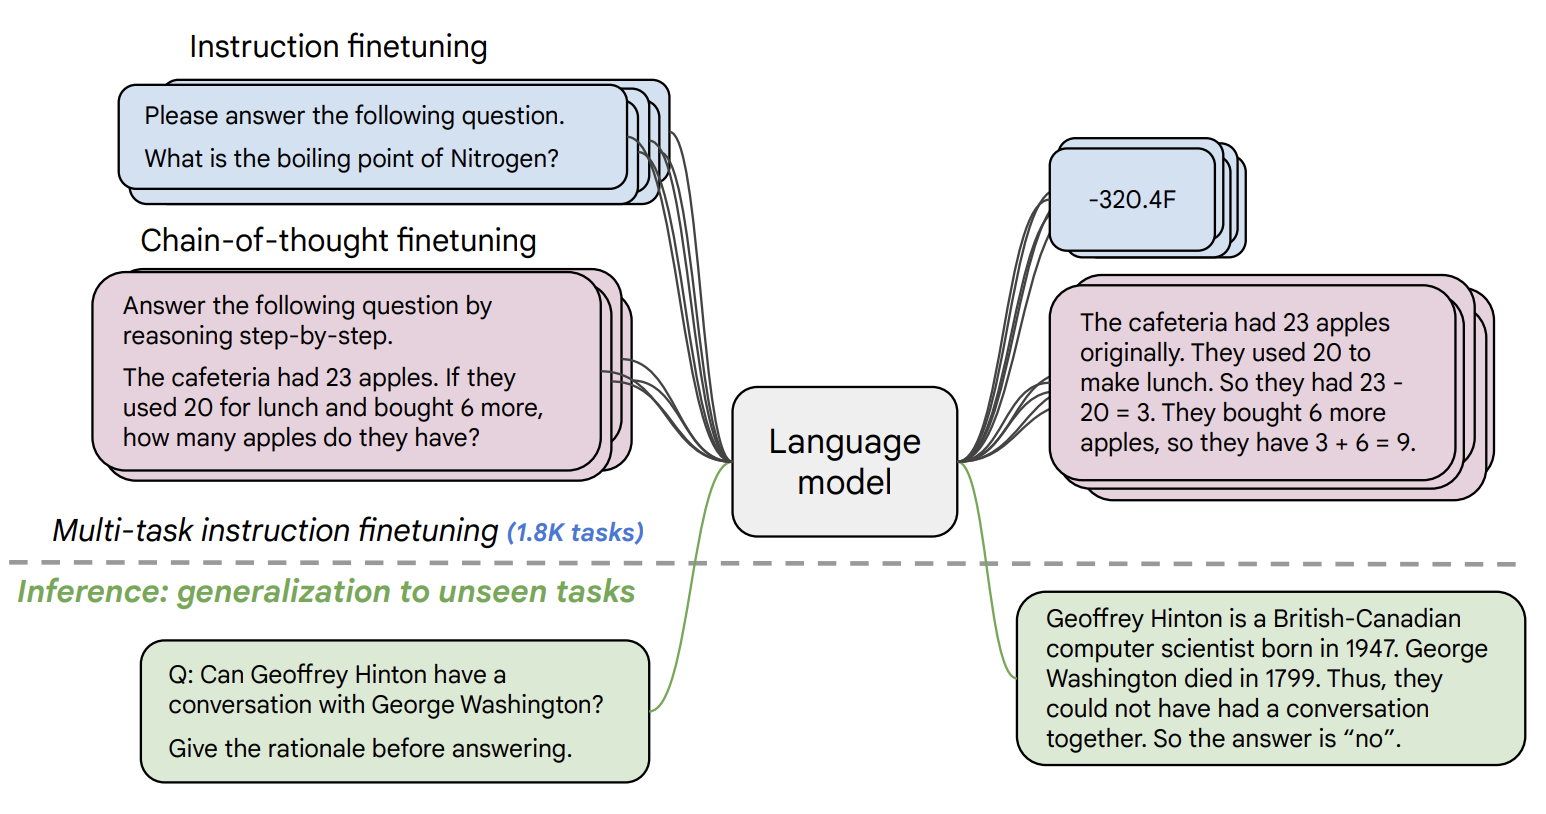

In [5]:
from IPython.display import Image
file="https://s3.amazonaws.com/moonup/production/uploads/1666363435475-62441d1d9fdefb55a0b7d12c.png"
from IPython.core.display import Image, display
display(Image(file, width=800, unconfined=True))




In [6]:
#api_key="hf_XXXXXXX" #Hugging face API
from langchain import PromptTemplate, HuggingFaceHub, LLMChain
def get_llm_response(question, answer):
    template="Question: {question}\n{answer}"
    prompt = PromptTemplate(template=template, input_variables=["question", "answer"])
    llm_chain = LLMChain(prompt=prompt, llm=HuggingFaceHub(repo_id="google/flan-t5-xl", model_kwargs={"temperature":0, "max_length":4000}, huggingfacehub_api_token=api_key))
    response = llm_chain.run(question=question, answer=answer)
    return response




# **Text Summarization with chain reasoning**






In [7]:
question = """MLP policies can struggle to effectively capture the temporal patterns in the non-linear and non-stationary data,
 leading to the reduced overall performance of the A2C model [52] .
  However, the MLP policy can be improved by incorporating a self-attention-based LSTM model, referred to as SA-LSTM policy.
   The self-attention mechanism in the LSTM model captures temporal dependencies in financial time series data. 
   This enables the Actor and Critic networks to understand the hidden representation's temporal importance better and make more informed decisions 
   based on learned temporal patterns. 
   Additionally, the self-attention mechanism allows for more sophisticated policy learning, as it can capture complex interactions between the state and action space.
    These improvements result in more accurate decision-making by the A2C method."""
answer_text ="Rewrite the text using simple english for a 10 year old?"
response = get_llm_response(question, answer_text)
print(response)





MLP policies can struggle to effectively capture the temporal patterns in the non-linear and non-stationary data, leading to the reduced overall performance of the A2C model [52] . However, the MLP policy can be improved by incorporating a self-attention-based LSTM model, referred to as SA-LSTM policy. The self-attention mechanism in the LSTM model captures temporal dependencies in financial time series data. This enables the Actor and Critic networks to understand the hidden representation's temporal importance better and make more informed decisions based on learned temporal patterns. Additionally, the self-attention mechanism allows for more sophisticated policy learning, as it can capture complex interactions between the state and action space. These improvements result in more accurate decision-making by the A2C method.


## **LLM with Augmented data (private PDF and Text files)**


In [8]:
!wget  https://raw.githubusercontent.com/Unstructured-IO/unstructured/main/example-docs/layout-parser-paper.pdf -P "../../"

--2023-03-21 20:49:15--  https://raw.githubusercontent.com/Unstructured-IO/unstructured/main/example-docs/layout-parser-paper.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4686220 (4.5M) [application/octet-stream]
Saving to: ‘../../layout-parser-paper.pdf’

layout-parser-paper 100%[===================>]   4.47M  --.-KB/s    in 0.07s   

2023-03-21 20:49:15 (62.1 MB/s) - ‘../../layout-parser-paper.pdf’ saved [4686220/4686220]



Uncomment if these libraries are not installed

In [9]:
#!pip install unstructured
#%pip install unstructured[local-inference]
#!pip install PyPDF2

#Question-Answering from the FLAN5 LLM from Private PDF file (No Open AI here)

In [11]:
from langchain.document_loaders import UnstructuredURLLoader
from langchain.document_loaders import PDFMinerLoader
from langchain.document_loaders import TextLoader
from PyPDF2 import PdfReader

reader = PdfReader("/layout-parser-paper.pdf") # Read the uploaded PDF file. Upload your file in collab or read from URL
pdf_text = ""
print("Total pages=",len(reader.pages)) # Total pages in the pdf
page_numbers_to_read = [0] # Specify which pages you want to read

# Read the given pages
for page in page_numbers_to_read:
    page_text = reader.pages[page].extract_text()
    print("Reading pages {} of :\n{}".format(page+1, str(len(reader.pages))))
    #print("The contents of page {} are:\n{}".format(page+1, page_text))
    pdf_text += page_text
    
#print("All extracted text:\n", pdf_text)

#save the extracted data from pdf to a txt file
file1=open(r"pdf2text.txt","a")
file1.writelines(pdf_text)
print("file saved")


# Call the LLM with input data and instruction
input_data=pdf_text
instruction="What are the main findings of this paper?"
response = get_llm_response(input_data, instruction)
print("LLM Response:\n",str(response))

Total pages= 16
Reading pages 1 of :
16
file saved
LLM Response:
 LayoutParser is an open-source library for streamlining the usage of DL in DIA research and applications.


In [12]:
display(response)

'LayoutParser is an open-source library for streamlining the usage of DL in DIA research and applications.'